# 04. PyTorch Custom Datasets

we've useed some datasets with PyTorch before.

But how do you get your own data into PyTorch?

One of the wats to do so is via: custom datasets.

## Domain libraries

Depending on what you're working on, vision, text, audio, recommendation, you'll want to look into each of the PyTorch domain libraries for existing data loading functions and customizable data loading functions

# 0. Importing PyTorch and seetting up devicee-agnostic code

In [1]:
import torch
from torch import nn

print(torch.__version__)

2.5.1+cpu


In [2]:
# Setup device-agnostic code
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cpu'

## 1. Get data

our dataset is a subseet of the Food101 dataset.

Food101 start 101 different classees of food and 1000 images peer class

out dataset start with 3 classes of food and only 10% of the images 

In [3]:
import requests
import zipfile
from pathlib import Path

# Setup path to data folder
data_path = Path("data/")
image_path = data_path / "pizza_steak_sushi"

# If the image folder doesn't exist, download it and prepare it... 
if image_path.is_dir():
    print(f"{image_path} directory exists.")
else:
    print(f"Did not find {image_path} directory, creating one...")
    image_path.mkdir(parents=True, exist_ok=True)
    
# Download pizza, steak, sushi data
with open(data_path / "pizza_steak_sushi.zip", "wb") as f:
    request = requests.get("https://github.com/mrdbourke/pytorch-deep-learning/raw/main/data/pizza_steak_sushi.zip")
    print("Downloading pizza, steak, sushi data...")
    f.write(request.content)

# Unzip pizza, steak, sushi data
with zipfile.ZipFile(data_path / "pizza_steak_sushi.zip", "r") as zip_ref:
    print("Unzipping pizza, steak, sushi data...") 
    zip_ref.extractall(image_path)
    

data\pizza_steak_sushi directory exists.
Unzipping pizza, steak, sushi data...


## 2. becoming one with the data

In [4]:
import os
def walk_through_dir(dir_path):
    """
    walks through dir_path returning its conteents
    """
    for dirpath, dirnames, filenames in os.walk(dir_path):
        print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'.")
        

In [5]:
walk_through_dir(image_path)

There are 2 directories and 0 images in 'data\pizza_steak_sushi'.
There are 3 directories and 0 images in 'data\pizza_steak_sushi\test'.
There are 0 directories and 25 images in 'data\pizza_steak_sushi\test\pizza'.
There are 0 directories and 19 images in 'data\pizza_steak_sushi\test\steak'.
There are 0 directories and 31 images in 'data\pizza_steak_sushi\test\sushi'.
There are 3 directories and 0 images in 'data\pizza_steak_sushi\train'.
There are 0 directories and 78 images in 'data\pizza_steak_sushi\train\pizza'.
There are 0 directories and 75 images in 'data\pizza_steak_sushi\train\steak'.
There are 0 directories and 72 images in 'data\pizza_steak_sushi\train\sushi'.


In [6]:
# Setup train and testing paths
train_path = image_path / "train"
test_path = image_path / "test"

### 2.1 Visualizing the image

Leeet's write somee code to:
1. Get all of thee image paths
2. Pick a random imagee path using Python's random.choice()
3. Get thee image class name using `pathlib.Path.parent.stem`
4. Load thee image using `matplotlib.pyplot.imread()`
5. Display the image using `matplotlib.pyplot.imshow()`

Image path: data\pizza_steak_sushi\test\sushi\2394442.jpg
Image class: sushi
Image size: (512, 408)
Image mode: RGB


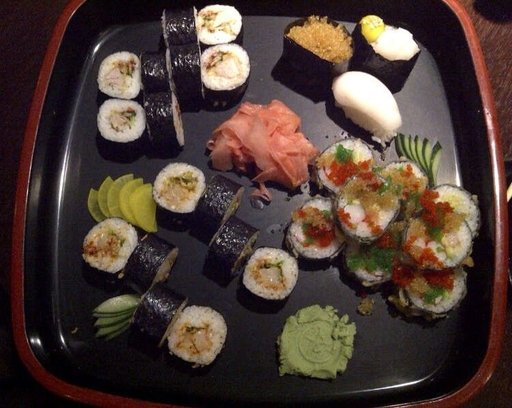

In [7]:
import random
from PIL import Image

# set random seed
random.seed(42)

# 1. get all image paths
image_path_list = list(image_path.glob("*/*/*.jpg"))

# 2. pick a random image path
random_image_path = random.choice(image_path_list)

# 3. Get image class from path name (the image class is the name of the directory it's in)
image_class = random_image_path.parent.name

# 4. Open the image using PIL
im = Image.open(random_image_path)

# 5. Print metadata
print(f"Image path: {random_image_path}")
print(f"Image class: {image_class}")
print(f"Image size: {im.size}")
print(f"Image mode: {im.mode}")
im

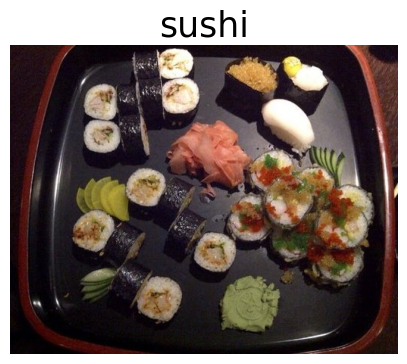

In [8]:
# Vizualize the image using matplotlib
import matplotlib.pyplot as plt

# set random seed
random.seed(42)

# 1. get all image paths
image_path_list = list(image_path.glob("*/*/*.jpg"))

# 2. pick a random image path
random_image_path = random.choice(image_path_list)

# 3. Get image class from path name (the image class is the name of the directory it's in)
image_class = random_image_path.parent.name

# 4. show the image using matplotlib
plt.figure(figsize=(5,5))
plt.imshow(plt.imread(random_image_path))
plt.title(f"{image_class}", c="black", fontsize=25)
plt.axis(False);


## 3. Transforming data

Before we can use our image data with PyTorch:
1. Turn your target data into tensors.
2. Turn it into a `torch.utils.data.Dataset` and subsequently a `torch.utils.data.DataLoader`. we'll call these Dataset and DataLoader

In [9]:
import torch
from torch.utils.data import DataLoader
from torchvision import datasets, transforms

### 3.1 Transforming data with `torchvision.transforms`

Transforms help you get your images ready to be used with a model/perform data augmentation

In [10]:
# write a transform for image
data_transform = transforms.Compose([
    transforms.Resize((64, 64)),
    # Flip the image horizontally with a 50% chance
    transforms.RandomHorizontalFlip(p=0.5),
    # Turn the image into a PyTorch tensor
    transforms.ToTensor()
])

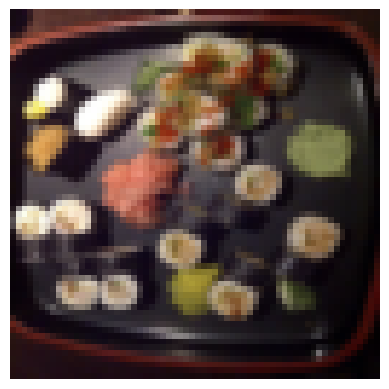

In [11]:
import numpy as np
import cv2

plt.imshow(data_transform(im).numpy().T)
plt.axis("off");

In [12]:
def plot_transformed_images(image_paths, transform, n=3, seed=42):
    """
    Selects random images from a path of images and loads/transforms
    them then plots the original vs the transformed version.
    """

    # Set the random seed
    if seed:
        random.seed(seed)
    random_image_paths = random.sample(image_paths, k=n)

    for image_path in random_image_paths:
        # read the image
        with Image.open(image_path) as f:
            fig, ax = plt.subplots(1, 2)
            ax[0].imshow(f)
            ax[0].set_title(f"Original\nSize: {f.size}")
            ax[0].axis(False)

            # Trahnsform and plot target image
            transformed_image = transform(f)
            ax[1].imshow(transformed_image.permute(1,2,0))
            ax[1].set_title(f"Transformed\nSize: {transformed_image.T.size()}")
            ax[1].axis(False)

            fig.suptitle(f"Image class: {image_path.parent.name}", fontsize=16)

            plt.show()
    

C:\Users\mehul\AppData\Local\Temp\ipykernel_53928\1458517506.py:23: UserWarning: The use of `x.T` on tensors of dimension other than 2 to reverse their shape is deprecated and it will throw an error in a future release. Consider `x.mT` to transpose batches of matrices or `x.permute(*torch.arange(x.ndim - 1, -1, -1))` to reverse the dimensions of a tensor. (Triggered internally at C:\actions-runner\_work\pytorch\pytorch\builder\windows\pytorch\aten\src\ATen\native\TensorShape.cpp:3687.)
  ax[1].set_title(f"Transformed\nSize: {transformed_image.T.size()}")


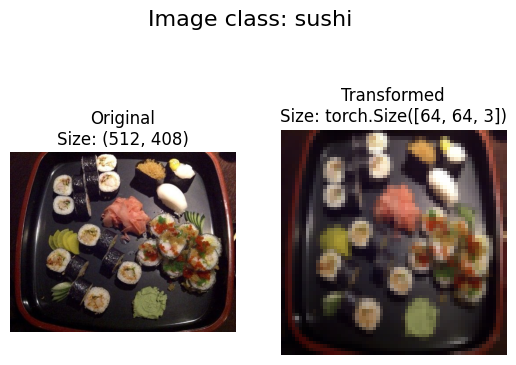

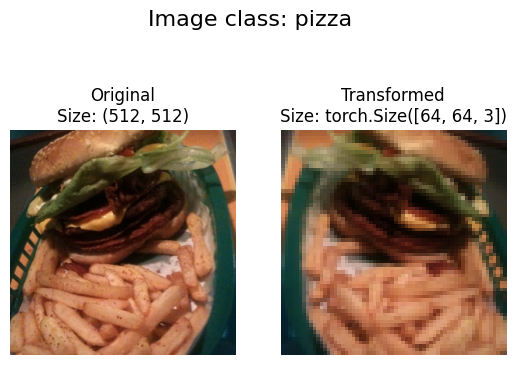

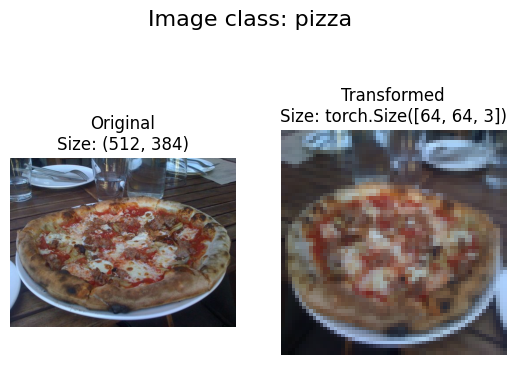

In [13]:
plot_transformed_images(image_paths=image_path_list, 
                        transform=data_transform, 
                        n=3, 
                        seed=42)

In [14]:
image_path_list

[WindowsPath('data/pizza_steak_sushi/test/pizza/1152100.jpg'),
 WindowsPath('data/pizza_steak_sushi/test/pizza/1503858.jpg'),
 WindowsPath('data/pizza_steak_sushi/test/pizza/1687143.jpg'),
 WindowsPath('data/pizza_steak_sushi/test/pizza/1925494.jpg'),
 WindowsPath('data/pizza_steak_sushi/test/pizza/194643.jpg'),
 WindowsPath('data/pizza_steak_sushi/test/pizza/195160.jpg'),
 WindowsPath('data/pizza_steak_sushi/test/pizza/2003290.jpg'),
 WindowsPath('data/pizza_steak_sushi/test/pizza/2019408.jpg'),
 WindowsPath('data/pizza_steak_sushi/test/pizza/2111981.jpg'),
 WindowsPath('data/pizza_steak_sushi/test/pizza/2124579.jpg'),
 WindowsPath('data/pizza_steak_sushi/test/pizza/2218680.jpg'),
 WindowsPath('data/pizza_steak_sushi/test/pizza/2236338.jpg'),
 WindowsPath('data/pizza_steak_sushi/test/pizza/2508636.jpg'),
 WindowsPath('data/pizza_steak_sushi/test/pizza/2871261.jpg'),
 WindowsPath('data/pizza_steak_sushi/test/pizza/3092704.jpg'),
 WindowsPath('data/pizza_steak_sushi/test/pizza/309892.jp

## 4. Option 1: Loading image data using PyTorch's ImageFolder class

we can load image classification data using `torchvision.datasets.ImageFolder`

In [15]:
train_path

WindowsPath('data/pizza_steak_sushi/train')

In [16]:
# use ImageFolder to create datasets
from torchvision.datasets import ImageFolder

# Load in the data from directory and turn it into a PyTorch dataset
train_data = datasets.ImageFolder(
    root=train_path,
    transform=data_transform,
    target_transform=None
)

test_data = datasets.ImageFolder(
    root=test_path,
    transform=data_transform,
    target_transform=None
)


print(train_data, test_data)

Dataset ImageFolder
    Number of datapoints: 225
    Root location: data\pizza_steak_sushi\train
    StandardTransform
Transform: Compose(
               Resize(size=(64, 64), interpolation=bilinear, max_size=None, antialias=True)
               RandomHorizontalFlip(p=0.5)
               ToTensor()
           ) Dataset ImageFolder
    Number of datapoints: 75
    Root location: data\pizza_steak_sushi\test
    StandardTransform
Transform: Compose(
               Resize(size=(64, 64), interpolation=bilinear, max_size=None, antialias=True)
               RandomHorizontalFlip(p=0.5)
               ToTensor()
           )


In [17]:
# Get the class names
class_names = train_data.classes
class_names

['pizza', 'steak', 'sushi']

In [18]:
# Get class name as dict
class_dict = train_data.class_to_idx
class_dict

{'pizza': 0, 'steak': 1, 'sushi': 2}

In [19]:
# Check the length of our data
len(train_data), len(test_data)

(225, 75)

In [20]:
train_data.targets[::20]

[0, 0, 0, 0, 1, 1, 1, 1, 2, 2, 2, 2]

In [21]:
# Index on tht train_data datasets to get a single image and label
img, label = train_data[0][0], train_data[0][1]

# Check the shape of the image tensor
print(f"Image tensor:\n {img}")
print(f"Image tensor shape: {img.shape}")
print(f"Image label: {label}")
print(f"Image data type: {img.dtype}")
print(f"Label data type: {type(label)}")

Image tensor:
 tensor([[[0.1137, 0.1020, 0.0980,  ..., 0.1255, 0.1216, 0.1176],
         [0.1059, 0.0980, 0.0980,  ..., 0.1294, 0.1294, 0.1294],
         [0.1020, 0.0980, 0.0941,  ..., 0.1333, 0.1333, 0.1333],
         ...,
         [0.1098, 0.1098, 0.1255,  ..., 0.1686, 0.1647, 0.1686],
         [0.0902, 0.0941, 0.1098,  ..., 0.1686, 0.1647, 0.1686],
         [0.0863, 0.0863, 0.0980,  ..., 0.1686, 0.1647, 0.1647]],

        [[0.0745, 0.0706, 0.0745,  ..., 0.0588, 0.0588, 0.0588],
         [0.0745, 0.0706, 0.0745,  ..., 0.0627, 0.0627, 0.0627],
         [0.0706, 0.0745, 0.0745,  ..., 0.0706, 0.0706, 0.0706],
         ...,
         [0.1255, 0.1333, 0.1373,  ..., 0.2510, 0.2392, 0.2392],
         [0.1098, 0.1176, 0.1255,  ..., 0.2510, 0.2392, 0.2314],
         [0.1020, 0.1059, 0.1137,  ..., 0.2431, 0.2353, 0.2275]],

        [[0.0941, 0.0902, 0.0902,  ..., 0.0157, 0.0196, 0.0196],
         [0.0902, 0.0863, 0.0902,  ..., 0.0196, 0.0157, 0.0196],
         [0.0902, 0.0902, 0.0902,  ..., 0.0

In [22]:
class_names[label]

'pizza'

Image tensor shape: torch.Size([64, 64, 3])
Original image tensor shape: torch.Size([3, 64, 64])


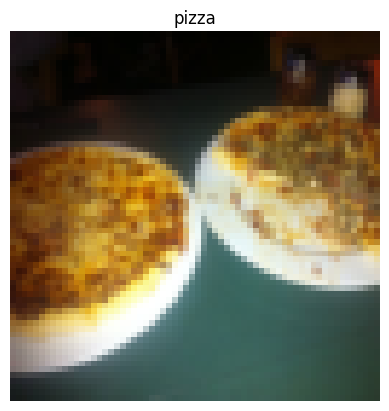

In [23]:
# Reaaragne the order dimensions
img_permute = img.permute(1, 2, 0)

# Check the shape of the permuted image tensor
print(f"Image tensor shape: {img_permute.shape}")
print(f"Original image tensor shape: {img.shape}")

# plot the image
plt.imshow(img_permute)
plt.title(class_names[label])
plt.axis(False);
plt.show()

### 4.1 Turn loaded images into `DataLoader's`

A `DataLoader` is going to help us turn our `Datasets` into iterables and we can customise the batch_size

In [24]:
# Convert the dataset into DataLoaders
from torch.utils.data import DataLoader

# Set a seed for reproducibility
torch.manual_seed(42)

# Create a DataLoader
train_dataloader = DataLoader(
    dataset=train_data,
    batch_size=32,
    shuffle=True,
    num_workers=12
)

test_dataloader = DataLoader(
    dataset=test_data,
    batch_size=32,
    shuffle=False,
    num_workers=12
)

# Check the shape of the first batch of images and labels
for images, labels in train_dataloader:
    print(f"Image batch shape: {images.shape}")
    print(f"Image label shape: {labels.shape}")
    print(f"Image labels: {labels}")
    break

len(train_dataloader), len(test_dataloader)

Image batch shape: torch.Size([32, 3, 64, 64])
Image label shape: torch.Size([32])
Image labels: tensor([2, 2, 1, 0, 0, 2, 2, 2, 1, 2, 1, 0, 1, 2, 2, 1, 0, 2, 1, 2, 1, 2, 0, 2,
        0, 2, 1, 2, 2, 0, 2, 0])


(8, 3)

In [25]:
len(train_dataloader.dataset), len(test_dataloader.dataset)

(225, 75)

In [26]:
img, label = next(iter(train_dataloader))

print(f"Image batch shape: {img.shape} -> (batch size, color channels, height, width)")
print(f"Image label shape: {label.shape}")
print(f"Image labels: {label}")
print(f"Image data type: {img.dtype}")
print(f"Label data type: {label.dtype}")


Image batch shape: torch.Size([32, 3, 64, 64]) -> (batch size, color channels, height, width)
Image label shape: torch.Size([32])
Image labels: tensor([0, 2, 0, 1, 2, 1, 2, 0, 1, 2, 2, 1, 0, 1, 2, 0, 2, 2, 0, 1, 1, 0, 0, 0,
        0, 1, 2, 2, 1, 1, 0, 1])
Image data type: torch.float32
Label data type: torch.int64


## 5. Option 2: Loading image Data with a Custom `Dataset` class

1. want to be able to load image from file
2. want to be able to get class names from the Dataset
3. want to be able to get classes as dictionary from the Dataset

Pros:
* Can createe a `Dataset` out of almost anything
* Not limited to PyTorch pre-built `Dataset` functions

Cons:
* Even though you can create `Dataset` out of almost anything, it doeesn't mean it will work...
* Using a custom `Dataset` often results in us writing more code, which could be prone to errors or performance issues

In [27]:
import os
import pathlib
import torch

from PIL import Image
from torch.utils.data import Dataset
from torchvision import transforms
from typing import Tuple, Dict, List

In [28]:
# instance of torchvision.datasets.ImageFolder()
train_data.classes, train_data.class_to_idx

(['pizza', 'steak', 'sushi'], {'pizza': 0, 'steak': 1, 'sushi': 2})

### 5.1 Creating a helper function to get class names

we want to function to:
1. Get the class names using `os.scandir()` to traverse a target directory (ideally the directory is in standard image classification format)
2. Raise an error if the class names aren't found (if this happens, there might be something wrong with the directory structure)
3. Turn the class names into a Python list and dict for easy reference

In [29]:
# Setup path for target directory
target_directory = train_path
print(f"Target directory: {target_directory}")

# Get the class names from the target directory
class_names = sorted([entry.name for entry in list(os.scandir(target_directory))])
class_names

Target directory: data\pizza_steak_sushi\train


['pizza', 'steak', 'sushi']

In [30]:
def find_classes(directory: str) -> Tuple[List[str], Dict[str, int]]:
    """
    Returns the class names and class indices for the target directory.
    """
    # 1. Get the class names by scanning the target directory
    classes = sorted([entry.name for entry in list(os.scandir(directory)) if entry.is_dir()])
    if not classes:
        raise FileNotFoundError(f"No valid subdirectories found in {directory}")
    # 2. Return the class names and class indices
    return classes, {class_name: i for i, class_name in enumerate(classes)}

# Get the class names and class indices
class_names, class_indices = find_classes(target_directory)
class_names, class_indices


(['pizza', 'steak', 'sushi'], {'pizza': 0, 'steak': 1, 'sushi': 2})

### 5.2 Create a custom `Dataset` to replicate `ImageFolder`


To Create our own custom dataset, we want to:
1. Subclass `torch.utils.data.Dataset`
2. Init our subclass with a target_directory (the directory we'd like to load images from) and a transform (a function to convert images to tensors)
3. Create several attributes:
    * paths - paths of our images
    * transform - the transforms we'd like to apply to our images
    * classes - a list of target classes
    * class_indices - a dictionary of class names to class indices
4. Create a function to `load_image()`, this function will load an image from a file path and convert it to a tensor
5. Overwrite the `__len__` method to return the length of the dataset
6. Overwrite the `__getitem__` method to return a sample from the dataset at a given index


In [31]:
# write a custom dataset class
from torch.utils.data import Dataset

# 1. Subclass torch.utils.data.Dataset
class ImageFolderCustom(Dataset):
    # 2. Define the constructor
    def __init__(self,
                 target_dir: str,
                 transform=None):
        super().__init__()
        # 3. Create class attributes for the target directory and transform
        # Get all of the image path
        self.image_paths = list(pathlib.Path(target_dir).glob("*/*.jpg"))
        # Setup transforms
        self.transform = transform
        # Create classes and class_to_idx attributes
        self.classes, self.class_to_idx = ImageFolderCustom.find_classes(target_dir)

    @staticmethod
    def find_classes(directory: str) -> Tuple[List[str], Dict[str, int]]:
        """
        Returns the class names and class indices for the target directory.
        """
        # 1. Get the class names by scanning the target directory
        classes = sorted([entry.name for entry in list(os.scandir(directory)) if entry.is_dir()])
        if not classes:
            raise FileNotFoundError(f"No valid subdirectories found in {directory}")
        # 2. Return the class names and class indices
        return classes, {class_name: i for i, class_name in enumerate(classes)}
    
    # 4. Create a function to load images
    def load_image(self, image_path: str) -> Image:
        """
        Opens an image via a path and returns it.
        """
        return Image.open(image_path)
    
    # 5. Define the length method
    def __len__(self):
        """
        Returns the total number of samples in the dataset.
        """
        return len(self.image_paths)
    
    # 6. Define the get item method
    def __getitem__(self, index: int) -> Tuple[torch.Tensor, int]:
        """
        Returns one sample of data, including the image and its label.
        """
        # 1. Get the image path using the index
        image_path = self.image_paths[index]

        # 2. Load the image
        image = self.load_image(image_path)

        # 3. Get the class label
        class_name = image_path.parent.name 
        label = self.class_to_idx[class_name]

        # 4. Apply the transform, if necessary
        if self.transform:
            image = self.transform(image)

        return image, label
        


In [32]:
# Create a transform
train_transforms = transforms.Compose([
    transforms.Resize((64, 64)),
    transforms.RandomHorizontalFlip(p=0.5),
    transforms.ToTensor()
])

test_transforms = transforms.Compose([
    transforms.Resize((64, 64)),
    transforms.ToTensor()
])


In [33]:
# Test out ImageFolderCustom
train_data_custom = ImageFolderCustom(
    target_dir=train_path,
    transform=train_transforms
)

test_data_custom = ImageFolderCustom(
    target_dir=test_path,
    transform=test_transforms
)

In [34]:
train_data_custom, test_data_custom

(<__main__.ImageFolderCustom at 0x1ea26cb26f0>,
 <__main__.ImageFolderCustom at 0x1ea305fc260>)

In [35]:
# Check the length of our custom datasets
print(len(train_data) , len(train_data_custom))


225 225


In [36]:
len(test_data), len(test_data_custom)

(75, 75)

In [37]:
train_data_custom.classes, train_data_custom.class_to_idx

(['pizza', 'steak', 'sushi'], {'pizza': 0, 'steak': 1, 'sushi': 2})

In [38]:
test_data_custom.classes, test_data_custom.class_to_idx

(['pizza', 'steak', 'sushi'], {'pizza': 0, 'steak': 1, 'sushi': 2})

In [39]:
# Check for equality between original ImageFolder and custom ImageFolder
print(train_data.classes == train_data_custom.classes)
print(test_data.classes == test_data_custom.classes)

True
True


### 5.3 Create a function to display random images

1. Take in a `Dataset` and a number of other parameters such as class names and how many images to visualize.
2. To prevent the display getting out of hand, let's cap the nummber of images to see at 10.
3. Set the random seed for reproducibility
4. Get a list of random sample indexes from the target dataset.
5. Setup a matplotlib plot.
6. Loop through the random sample images and plot them with matplotlib
7. Make sure the dimension of our images line up with matplotlib

In [40]:
# 1. Create a function to take in Dataset
def display_random_images(
        dataset: torch.utils.data.Dataset,
        classes: List[str] = None,
        n: int = 10,
        display_shape: bool = True,
        seed: int = None):
    # 2. Adjust display if n is too high
    if n > 10:
        print(f"Displaying 10 images, n is too high.")
        n = 10
    
    # 3. Set the random seed
    if seed:
        torch.manual_seed(seed)

    # 4. Get the random sample indexes
    random_indexes = torch.randperm(len(dataset)).tolist()[:n]

    # 5. Setup plot
    plt.figure(figsize=(16, 20))

    # 5. Loop through random indexes and plot them with matplotlib
    for i, target_sample in enumerate(random_indexes):
        target_image, target_label = dataset[target_sample][0], dataset[target_sample][1]

        # 7. Adjust tensor dimension for plotting
        target_image_adjust = target_image.permute(1, 2, 0)

        # 8. Plot the image
        plt.subplot(1,n, i+1)
        plt.imshow(target_image_adjust)
        plt.axis("off")
        if classes:
            title = classes[target_label]
            if display_shape:
                title += f"\n shape{target_image.shape}"
        plt.title(title, c="black", fontsize=8)


In [41]:
torch.randperm(len(train_data)).tolist()[:10]


[175, 218, 145, 169, 204, 119, 123, 201, 105, 40]

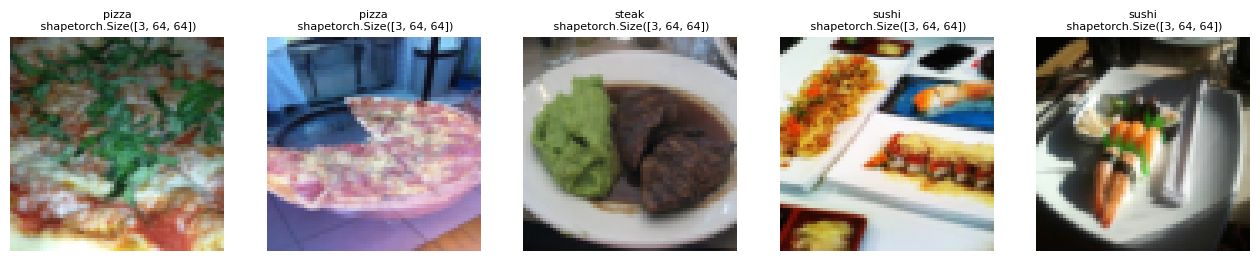

In [42]:
# Display random images from the ImageFolder dataset
display_random_images(
    dataset=train_data,
    classes=train_data.classes,
    n=5,
    display_shape=True,
    seed=42
)

Displaying 10 images, n is too high.


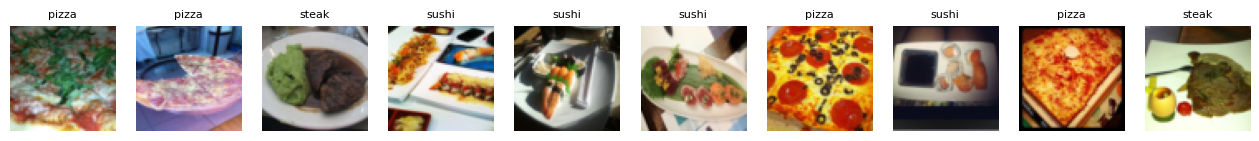

In [43]:
# Display random images from the custom ImageFolder dataset

display_random_images(
    dataset=train_data_custom,
    classes=train_data_custom.classes,
    n=20,
    display_shape=False,
    seed=42
)

### 5.4 Turn custom loaded images into DataLoader's

In [44]:
os.cpu_count()

12

In [45]:
from torch.utils.data import DataLoader
BATCH_SIZE = 32
train_dataloader_custom = DataLoader(
    dataset=train_data_custom,
    batch_size=BATCH_SIZE,
    shuffle=True,
    num_workers=0
)

test_dataloader_custom = DataLoader(
    dataset=test_data_custom,
    batch_size=BATCH_SIZE,
    shuffle=False,
    num_workers=0
)

train_dataloader_custom, test_dataloader_custom

(<torch.utils.data.dataloader.DataLoader at 0x1ea31c52060>,
 <torch.utils.data.dataloader.DataLoader at 0x1ea317990a0>)

In [46]:
img_batch, labels = next(iter(train_dataloader_custom))

print(f"Image batch shape: {img_batch.shape}")
print(f"Image label shape: {labels.shape}")
print(f"Image labels: {labels}")

Image batch shape: torch.Size([32, 3, 64, 64])
Image label shape: torch.Size([32])
Image labels: tensor([2, 0, 1, 2, 1, 0, 0, 1, 0, 2, 0, 2, 2, 2, 0, 2, 2, 0, 2, 1, 1, 0, 0, 2,
        1, 0, 0, 2, 1, 1, 1, 0])


## 6. Other forms of transforms (data augmentation)


Data augmentation is the process of artifically  adding diversity to your training data.

In the case of image data, this may mean applying various image transformations to the training images.


Let's take a look at one particular type of data augmentation to train PyTorch
vision models to state of the art levels...

In [47]:
# Let's look at trivialAgument transforms

from torchvision import transforms

train_transform = transforms.Compose(
    [
        transforms.Resize((224,224)),
        transforms.TrivialAugmentWide(num_magnitude_bins=31),
        transforms.ToTensor()
    ]
)

test_transform = transforms.Compose(
    [
        transforms.Resize((224,224)),
        transforms.ToTensor()
    ]
)

In [48]:
# Get all image paths
image_path_list = list(image_path.glob("*/*/*.jpg"))
image_path_list[:5]

[WindowsPath('data/pizza_steak_sushi/test/pizza/1152100.jpg'),
 WindowsPath('data/pizza_steak_sushi/test/pizza/1503858.jpg'),
 WindowsPath('data/pizza_steak_sushi/test/pizza/1687143.jpg'),
 WindowsPath('data/pizza_steak_sushi/test/pizza/1925494.jpg'),
 WindowsPath('data/pizza_steak_sushi/test/pizza/194643.jpg')]

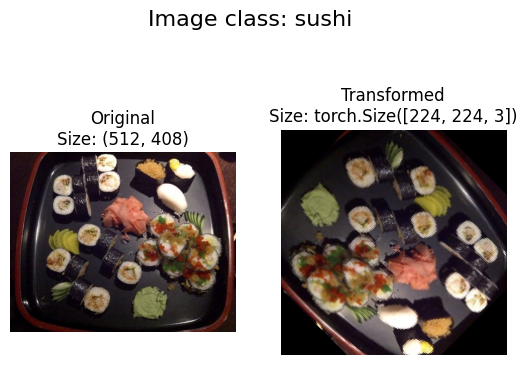

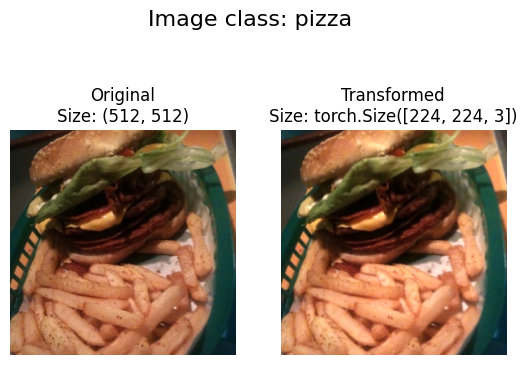

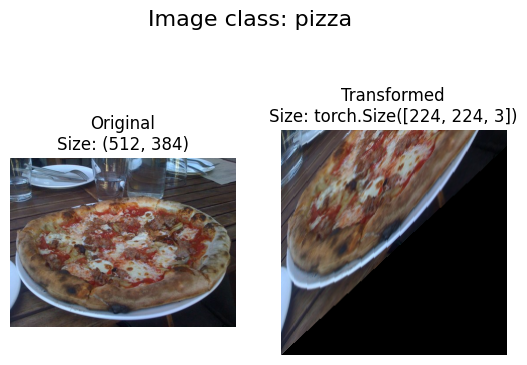

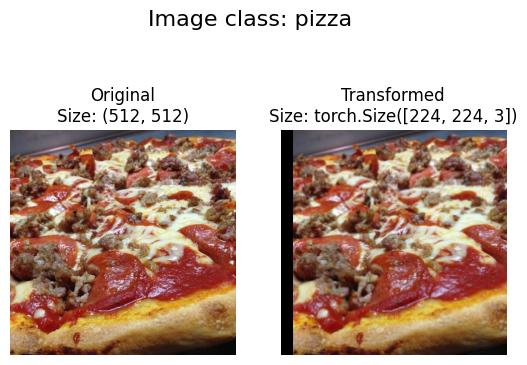

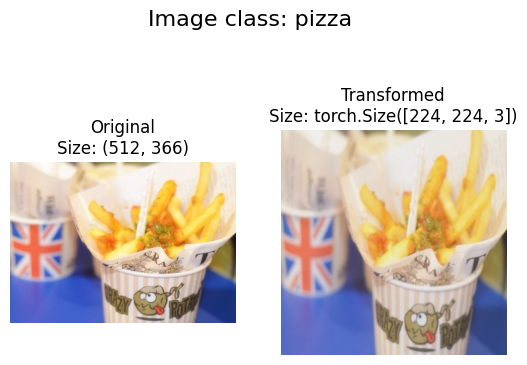

In [49]:
# Plot random transformed images
plot_transformed_images(
    image_paths=image_path_list,
    transform=train_transform,
    n=5,
    seed=42
)

In [50]:
## 7. Model 0: TinyVGG without data augmentation

### 7.1 Creating transforms and loading data for Model 0

In [51]:
# Create a simple transforms
train_transforms = transforms.Compose([
    transforms.Resize((64, 64)),
    transforms.ToTensor()
])

test_transforms = transforms.Compose([
    transforms.Resize((64, 64)),
    transforms.ToTensor()
])

In [52]:
# 1. Loading the images using ImageFolder
from torchvision.datasets import ImageFolder

# Load in the data from directory and turn it into a PyTorch dataset
train_data = ImageFolder(
    root= train_path,
    transform=train_transforms
)

test_data = ImageFolder(
    root=test_path,
    transform=test_transforms
)

train_data, test_data

(Dataset ImageFolder
     Number of datapoints: 225
     Root location: data\pizza_steak_sushi\train
     StandardTransform
 Transform: Compose(
                Resize(size=(64, 64), interpolation=bilinear, max_size=None, antialias=True)
                ToTensor()
            ),
 Dataset ImageFolder
     Number of datapoints: 75
     Root location: data\pizza_steak_sushi\test
     StandardTransform
 Transform: Compose(
                Resize(size=(64, 64), interpolation=bilinear, max_size=None, antialias=True)
                ToTensor()
            ))

In [53]:
# 2. Create DataLoader
from torch.utils.data import DataLoader

# Set a seed for reproducibility
torch.manual_seed(42)

BATCH_SIZE = 32

# Create a DataLoader
train_dataloader = DataLoader(
    dataset=train_data,
    batch_size=BATCH_SIZE,
    shuffle=True,
    num_workers=0
)

test_dataloader = DataLoader(
    dataset=test_data,
    batch_size=BATCH_SIZE,
    shuffle=False,
    num_workers=0
)

# Check the shape of the first batch of images and labels
for images, labels in train_dataloader:
    print(f"Image batch shape: {images.shape}")
    print(f"Image label shape: {labels.shape}")
    print(f"Image labels: {labels}")
    break

Image batch shape: torch.Size([32, 3, 64, 64])
Image label shape: torch.Size([32])
Image labels: tensor([2, 2, 1, 0, 0, 2, 2, 2, 1, 2, 1, 0, 1, 2, 2, 1, 0, 2, 1, 2, 1, 2, 0, 2,
        0, 2, 1, 2, 2, 0, 2, 0])


In [54]:
# 1. Loading the data using custom Dataset Class
train_data_custom = ImageFolderCustom(
    target_dir=train_path,
    transform=train_transforms
)

test_data_custom = ImageFolderCustom(
    target_dir=test_path,
    transform=test_transforms
)

# 2. Create DataLoader

torch.manual_seed(42)

train_dataloader_custom = DataLoader(
    dataset=train_data_custom,
    batch_size=BATCH_SIZE,
    shuffle=True,
    num_workers=0
)

test_dataloader_custom = DataLoader(
    dataset=test_data_custom,
    batch_size=BATCH_SIZE,
    shuffle=False,
    num_workers=0
)

# Check the shape of the first batch of images and labels
for images, labels in train_dataloader_custom:
    print(f"Image batch shape: {images.shape}")
    print(f"Image label shape: {labels.shape}")
    print(f"Image labels : {labels}")

    break


Image batch shape: torch.Size([32, 3, 64, 64])
Image label shape: torch.Size([32])
Image labels : tensor([2, 2, 1, 0, 0, 2, 2, 2, 1, 2, 1, 0, 1, 2, 2, 1, 0, 2, 1, 2, 1, 2, 0, 2,
        0, 2, 1, 2, 2, 0, 2, 0])


### 7.2 Create TinyVGG model class

In [55]:
class TinyVGG(nn.Module):
    """
    Model architecture copying TinyVGG from cnn explainer.
    """
    def __init__(self,
                 input_shape: int,
                 hidden_shape: int,
                 output_shape: int) -> None:
        super(TinyVGG, self).__init__()
        # Define the convolutional layers
        self.conv_block_1 = nn.Sequential(
            nn.Conv2d(
                input_shape,
                hidden_shape,
                kernel_size=3,
                padding=0,
                stride=1
            ),
            nn.ReLU(),
            nn.Conv2d(
                hidden_shape,
                hidden_shape,
                kernel_size=3,
                padding=0,
                stride=1
            ),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2)
        )
        self.conv_block_2 = nn.Sequential(
            nn.Conv2d(
                hidden_shape,
                hidden_shape,
                kernel_size=3,
                padding=0,
                stride=1
            ),
            nn.ReLU(),
            nn.Conv2d(
                hidden_shape,
                hidden_shape,
                kernel_size=3,
                padding=0,
                stride=1
            ),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2)
        )
        # Define the fully connected layers
        self.classifier = nn.Sequential(
            nn.Flatten(),
            nn.Linear(hidden_shape*13*13, output_shape),
        )

    def forward(self, x: torch.Tensor) -> torch.Tensor:
        x = self.conv_block_1(x)
        # print(x.shape)
        x = self.conv_block_2(x)
        # print(x.shape)
        x = self.classifier(x)
        return x
        

In [56]:
# Set the device
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cpu'

In [57]:
# Instantiate the model
torch.manual_seed(42)
model_0 = TinyVGG(input_shape=3, 
                  hidden_shape=10, 
                  output_shape=3).to(device)

model_0

TinyVGG(
  (conv_block_1): Sequential(
    (0): Conv2d(3, 10, kernel_size=(3, 3), stride=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (conv_block_2): Sequential(
    (0): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (classifier): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=1690, out_features=3, bias=True)
  )
)

In [58]:
# pass dummy data to find the shape for input in classifier layer

dummy_image = torch.randn(3,64,64).unsqueeze(0).to(device)
model_0(dummy_image)


tensor([[ 0.0216, -0.0143, -0.0036]], grad_fn=<AddmmBackward0>)

### 7.4 Use `torchinfo` to get an idea of the shapes going through our model

In [59]:
import torchinfo

# Use torchinfo to summarize the model
model_0_info = torchinfo.summary(model_0, input_data=dummy_image)
model_0_info

Layer (type:depth-idx)                   Output Shape              Param #
TinyVGG                                  [1, 3]                    --
├─Sequential: 1-1                        [1, 10, 30, 30]           --
│    └─Conv2d: 2-1                       [1, 10, 62, 62]           280
│    └─ReLU: 2-2                         [1, 10, 62, 62]           --
│    └─Conv2d: 2-3                       [1, 10, 60, 60]           910
│    └─ReLU: 2-4                         [1, 10, 60, 60]           --
│    └─MaxPool2d: 2-5                    [1, 10, 30, 30]           --
├─Sequential: 1-2                        [1, 10, 13, 13]           --
│    └─Conv2d: 2-6                       [1, 10, 28, 28]           910
│    └─ReLU: 2-7                         [1, 10, 28, 28]           --
│    └─Conv2d: 2-8                       [1, 10, 26, 26]           910
│    └─ReLU: 2-9                         [1, 10, 26, 26]           --
│    └─MaxPool2d: 2-10                   [1, 10, 13, 13]           --
├─Sequentia

## 7.5 Create train and test loops functions

* `train_step()`- takes in a model and data loader and performs a training step, returning the loss and accuracy.
* `test_step()` - takes in a model and data loader and performs a testing step, returning the loss and accuracy.



In [60]:
def train_step(model: torch.nn.Module, 
               dataloader: torch.utils.data.DataLoader, 
               loss_fn: torch.nn.Module, 
               optimizer: torch.optim.Optimizer,
               device: str):
    # Put model in train mode
    model.train()
    
    # Setup train loss and train accuracy values
    train_loss, train_acc = 0, 0
    
    # Loop through data loader data batches
    for batch, (X, y) in enumerate(dataloader):
        # Send data to target device
        X, y = X.to(device), y.to(device)

        # 1. Forward pass
        y_pred = model(X)

        # 2. Calculate  and accumulate loss
        loss = loss_fn(y_pred, y)
        train_loss += loss.item() 

        # 3. Optimizer zero grad
        optimizer.zero_grad()

        # 4. Loss backward
        loss.backward()

        # 5. Optimizer step
        optimizer.step()

        # Calculate and accumulate accuracy metrics across all batches
        y_pred_class = torch.argmax(torch.softmax(y_pred, dim=1), dim=1)
        train_acc += (y_pred_class == y).sum().item()/len(y_pred)

    # Adjust metrics to get average loss and accuracy per batch 
    train_loss = train_loss / len(dataloader)
    train_acc = train_acc / len(dataloader)
    return train_loss, train_acc

In [61]:
def test_step(model: torch.nn.Module, 
              dataloader: torch.utils.data.DataLoader, 
              loss_fn: torch.nn.Module,
              device: str):
    # Put model in eval mode
    model.eval() 
    
    # Setup test loss and test accuracy values
    test_loss, test_acc = 0, 0
    
    # Turn on inference context manager
    with torch.inference_mode():
        # Loop through DataLoader batches
        for batch, (X, y) in enumerate(dataloader):
            # Send data to target device
            X, y = X.to(device), y.to(device)
    
            # 1. Forward pass
            test_pred_logits = model(X)

            # 2. Calculate and accumulate loss
            loss = loss_fn(test_pred_logits, y)
            test_loss += loss.item()
            
            # Calculate and accumulate accuracy
            test_pred_labels = test_pred_logits.argmax(dim=1)
            test_acc += ((test_pred_labels == y).sum().item()/len(test_pred_labels))
            
    # Adjust metrics to get average loss and accuracy per batch 
    test_loss = test_loss / len(dataloader)
    test_acc = test_acc / len(dataloader)
    return test_loss, test_acc

### 7.6 Creating a train() function to combine train_step() and test_step()

In [62]:
from tqdm.auto import tqdm

# 1. Take in various parameters required for training and test steps
def train(model: torch.nn.Module, 
          train_dataloader: torch.utils.data.DataLoader, 
          test_dataloader: torch.utils.data.DataLoader, 
          optimizer: torch.optim.Optimizer,
          loss_fn: torch.nn.Module = nn.CrossEntropyLoss(),
          epochs: int = 5,
          device: str = "cpu"):
    
    # 2. Create empty results dictionary
    results = {"train_loss": [],
        "train_acc": [],
        "test_loss": [],
        "test_acc": []
    }
    
    # 3. Loop through training and testing steps for a number of epochs
    for epoch in tqdm(range(epochs)):
        train_loss, train_acc = train_step(model=model,
                                           dataloader=train_dataloader,
                                           loss_fn=loss_fn,
                                           optimizer=optimizer,
                                           device=device)
        test_loss, test_acc = test_step(model=model,
            dataloader=test_dataloader,
            loss_fn=loss_fn,
            device=device)
        
        # 4. Print out what's happening
        print(
            f"Epoch: {epoch+1} | "
            f"train_loss: {train_loss:.4f} | "
            f"train_acc: {train_acc:.4f} | "
            f"test_loss: {test_loss:.4f} | "
            f"test_acc: {test_acc:.4f}"
        )

        # 5. Update results dictionary
        # Ensure all data is moved to CPU and converted to float for storage
        results["train_loss"].append(train_loss.item() if isinstance(train_loss, torch.Tensor) else train_loss)
        results["train_acc"].append(train_acc.item() if isinstance(train_acc, torch.Tensor) else train_acc)
        results["test_loss"].append(test_loss.item() if isinstance(test_loss, torch.Tensor) else test_loss)
        results["test_acc"].append(test_acc.item() if isinstance(test_acc, torch.Tensor) else test_acc)

    # 6. Return the filled results at the end of the epochs
    return results

### 7.7 Train and evaluate model 0 (baseline)

In [99]:
# Set random seeds
torch.manual_seed(42)
torch.cuda.manual_seed(42)

# Setup loss function and optimizer
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model_0.parameters(), lr=1e-4)

# Recreate an instance of model
model_0 = TinyVGG(input_shape=3, hidden_shape=10, output_shape=3).to(device)

# Num of epoch 
EPOCHS = 10

# Start the timer
from timeit import default_timer as timer
start = timer()

# Train the model 0
model_0_results = train(
    model=model_0,
    train_dataloader=train_dataloader,
    test_dataloader=test_dataloader,
    optimizer=optimizer,
    device=device,
    epochs=EPOCHS,
    loss_fn=loss_fn
)

# End the timer
end = timer()
print(f"Time taken: {end-start:.3f} seconds")

  0%|          | 0/10 [00:00<?, ?it/s]

Epoch: 1 | train_loss: 1.0979 | train_acc: 0.3047 | test_loss: 1.0976 | test_acc: 0.2604
Epoch: 2 | train_loss: 1.0986 | train_acc: 0.3047 | test_loss: 1.0976 | test_acc: 0.2604
Epoch: 3 | train_loss: 1.0978 | train_acc: 0.3047 | test_loss: 1.0976 | test_acc: 0.2604
Epoch: 4 | train_loss: 1.0994 | train_acc: 0.3047 | test_loss: 1.0976 | test_acc: 0.2604
Epoch: 5 | train_loss: 1.0978 | train_acc: 0.3047 | test_loss: 1.0976 | test_acc: 0.2604
Epoch: 6 | train_loss: 1.0979 | train_acc: 0.3047 | test_loss: 1.0976 | test_acc: 0.2604
Epoch: 7 | train_loss: 1.0979 | train_acc: 0.3047 | test_loss: 1.0976 | test_acc: 0.2604
Epoch: 8 | train_loss: 1.0992 | train_acc: 0.3047 | test_loss: 1.0976 | test_acc: 0.2604
Epoch: 9 | train_loss: 1.0963 | train_acc: 0.4258 | test_loss: 1.0976 | test_acc: 0.2604
Epoch: 10 | train_loss: 1.0976 | train_acc: 0.3047 | test_loss: 1.0976 | test_acc: 0.2604
Time taken: 9.173 seconds


In [64]:
model_0_results

{'train_loss': [1.0979430675506592,
  1.098580852150917,
  1.0977855622768402,
  1.0993992686271667,
  1.0977774858474731,
  1.0979290306568146,
  1.0979271978139877,
  1.0991815477609634,
  1.0962590128183365,
  1.0976466089487076,
  1.097524344921112,
  1.0962850749492645,
  1.098718523979187,
  1.097943052649498,
  1.0975456237792969,
  1.0990119576454163,
  1.096459910273552,
  1.0978509336709976,
  1.0964203923940659,
  1.0978163033723831,
  1.0977492332458496,
  1.0963046252727509,
  1.0964787751436234,
  1.0978612154722214,
  1.0985599160194397,
  1.0962869673967361,
  1.0987647324800491,
  1.0977107286453247,
  1.098559945821762,
  1.097929060459137,
  1.0963310599327087,
  1.0987823456525803,
  1.098925694823265,
  1.0976028889417648,
  1.0967226028442383,
  1.0991114377975464,
  1.096466213464737,
  1.0985386073589325,
  1.096435695886612,
  1.0965044498443604,
  1.0978279113769531,
  1.099008098244667,
  1.096332609653473,
  1.097626581788063,
  1.0978612154722214,
  1.09817

### 7.8 Plot the loss curves of Model 0

In [65]:
# Get the model_0_results keys
model_0_results.keys()

dict_keys(['train_loss', 'train_acc', 'test_loss', 'test_acc'])

In [66]:
def plot_loss_curves(
        results: Dict[str, List[float]]
):
    # Get the loss values of the results dictionary
    train_loss = results["train_loss"]
    test_loss = results["test_loss"]

    # Get the accuracy values of the results dictionary
    train_acc = results["train_acc"]
    test_acc = results["test_acc"]

    # Figure out how many epochs the model was trained for
    epochs = range(len(train_loss))

    # Setup a plot
    plt.figure(figsize=(12, 6))

    # Plot the loss
    plt.subplot(1, 2, 1)
    plt.plot(epochs, train_loss, label="train_loss")
    plt.plot(epochs, test_loss, label="test_loss")
    plt.title("Loss vs epochs")
    plt.xlabel("Epochs")
    plt.ylabel("Loss")
    plt.legend()

    # Plot the accuracy
    plt.subplot(1, 2, 2)
    plt.plot(epochs, train_acc, label="train_acc")
    plt.plot(epochs, test_acc, label="test_acc")
    plt.title("Accuracy vs epochs")
    plt.xlabel("Epochs")
    plt.ylabel("Accuracy")
    plt.legend()

    # Show the plot
    plt.show()


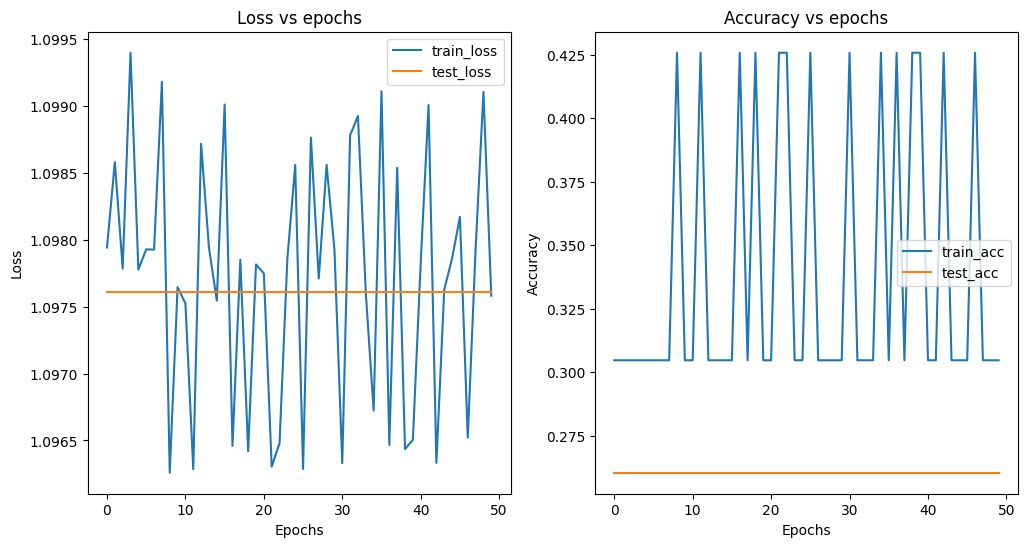

In [68]:
plot_loss_curves(model_0_results)

## 9. TinyVGG with Data Augmentation

Now let's try another modelling experiment this time using model as before with some data augmentation

### 9.1 Create transform with data augmentation

In [82]:
# Create training transform with TrivialAugmentWide
from torchvision import transforms

train_transform_trivial = transforms.Compose([
    transforms.Resize(size=(64,64)),
    transforms.TrivialAugmentWide(num_magnitude_bins=31),
    transforms.ToTensor(),
    transforms.Normalize(
        mean=[0.4794, 0.3907, 0.3216],
        std =[0.3042, 0.2847, 0.2803]
    ),
    ])

# Create test transform

test_transform_trivial = transforms.Compose([
    transforms.Resize(size=(64,64)),
    transforms.ToTensor(),
    transforms.Normalize(
        mean=[0.4794, 0.3907, 0.3216],
        std =[0.3042, 0.2847, 0.2803]
    ),
])

### 9.2 Create train and test `Datasets` and `DataLoaders` with data augmentation

In [83]:
# Turn ImageFolders into Datasets
from torchvision import datasets
train_data_augmented = datasets.ImageFolder(
    root=train_path,
    transform=train_transform_trivial
)

test_data_augmented = datasets.ImageFolder(
    root=test_path,
    transform=test_transform_trivial
)

# Create DataLoader
import os

BATCH_SIZE = 32
NUM_WORKERS = os.cpu_count()

torch.manual_seed(42)

train_dataloader_augmented = DataLoader(
    dataset=train_data_augmented,
    batch_size=BATCH_SIZE,
    shuffle=True,
    num_workers=NUM_WORKERS
)

test_dataloader_augmented = DataLoader(
    dataset=test_data_augmented,
    batch_size=BATCH_SIZE,
    shuffle=False,
    num_workers=NUM_WORKERS
)

# Check the shape of the first batch of images and labels
for images, labels in train_dataloader_augmented:
    print(f"Image batch shape: {images.shape}")
    print(f"Image label shape: {labels.shape}")
    print(f"Image labels: {labels}")
    break

Image batch shape: torch.Size([32, 3, 64, 64])
Image label shape: torch.Size([32])
Image labels: tensor([2, 2, 1, 0, 0, 2, 2, 2, 1, 2, 1, 0, 1, 2, 2, 1, 0, 2, 1, 2, 1, 2, 0, 2,
        0, 2, 1, 2, 2, 0, 2, 0])


### 9.3 Construct and train model 1

In [87]:
torch.manual_seed(42)

# Create a new model instance
model_1 = TinyVGG(
    input_shape=3,
    hidden_shape=10,
    output_shape=3
)

# Set the device
device = "cuda" if torch.cuda.is_available() else "cpu"

# Move the model to the device
model_1.to(device)

TinyVGG(
  (conv_block_1): Sequential(
    (0): Conv2d(3, 10, kernel_size=(3, 3), stride=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (conv_block_2): Sequential(
    (0): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (classifier): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=1690, out_features=3, bias=True)
  )
)

In [88]:
# Setup optimizer and the loss function
torch.manual_seed(42)
torch.cuda.manual_seed(42)

optimizer = torch.optim.Adam(model_1.parameters(), lr=1e-4)

loss_fn = nn.CrossEntropyLoss()


In [89]:
## training and testing loop
EPOCHS = 10

# Start the timer
from timeit import default_timer as timer
start = timer()

# Train the model
model_1_results = train(
    model=model_1,
    train_dataloader=train_dataloader_augmented,
    test_dataloader=test_dataloader_augmented,
    optimizer=optimizer,
    device=device,
    epochs=EPOCHS,
    loss_fn=loss_fn
)

# End the timer
end = timer()

print(f"Time taken: {end-start:.3f} seconds")


  0%|          | 0/10 [00:00<?, ?it/s]

Epoch: 1 | train_loss: 1.0995 | train_acc: 0.2852 | test_loss: 1.1014 | test_acc: 0.2500
Epoch: 2 | train_loss: 1.0982 | train_acc: 0.3047 | test_loss: 1.0973 | test_acc: 0.3589
Epoch: 3 | train_loss: 1.0972 | train_acc: 0.3320 | test_loss: 1.0987 | test_acc: 0.2178
Epoch: 4 | train_loss: 1.0959 | train_acc: 0.4180 | test_loss: 1.0966 | test_acc: 0.2178
Epoch: 5 | train_loss: 1.0963 | train_acc: 0.3008 | test_loss: 1.0987 | test_acc: 0.1979
Epoch: 6 | train_loss: 1.0941 | train_acc: 0.2930 | test_loss: 1.0958 | test_acc: 0.2386
Epoch: 7 | train_loss: 1.0938 | train_acc: 0.2969 | test_loss: 1.0894 | test_acc: 0.4309
Epoch: 8 | train_loss: 1.0911 | train_acc: 0.4727 | test_loss: 1.0849 | test_acc: 0.5938
Epoch: 9 | train_loss: 1.1097 | train_acc: 0.3320 | test_loss: 1.0890 | test_acc: 0.3712
Epoch: 10 | train_loss: 1.0921 | train_acc: 0.3359 | test_loss: 1.0915 | test_acc: 0.3608
Time taken: 198.739 seconds


### 9.4 Plot theloss curves of model 1

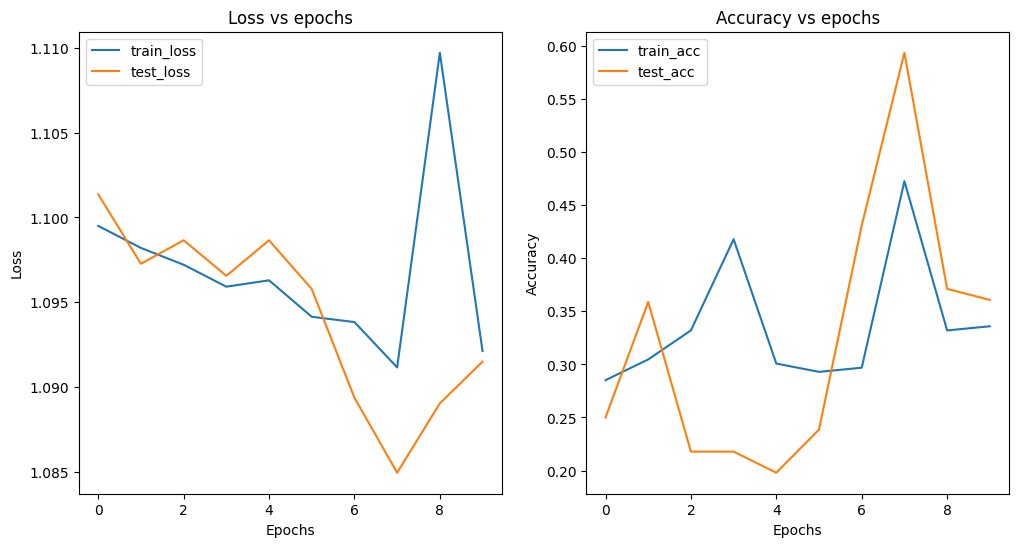

In [90]:
plot_loss_curves(
    model_1_results
)

## 10. Compare model results

After evaluating our modelling experiments on their own, it's important to compare them to each other.

There's a few different ways to do this:
1. Hard coding (what we're doing)
2. PyTorch + Tensorboard
3. weights & Biases (wandb)
4. MLFLOw

In [91]:
import pandas as pd
model_0_df = pd.DataFrame(model_0_results)
model_1_df = pd.DataFrame(model_1_results)

model_0_df, model_1_df

(    train_loss  train_acc  test_loss  test_acc
 0     1.097943   0.304688   1.097608  0.260417
 1     1.098581   0.304688   1.097608  0.260417
 2     1.097786   0.304688   1.097608  0.260417
 3     1.099399   0.304688   1.097608  0.260417
 4     1.097777   0.304688   1.097608  0.260417
 5     1.097929   0.304688   1.097608  0.260417
 6     1.097927   0.304688   1.097608  0.260417
 7     1.099182   0.304688   1.097608  0.260417
 8     1.096259   0.425781   1.097608  0.260417
 9     1.097647   0.304688   1.097608  0.260417
 10    1.097524   0.304688   1.097608  0.260417
 11    1.096285   0.425781   1.097608  0.260417
 12    1.098719   0.304688   1.097608  0.260417
 13    1.097943   0.304688   1.097608  0.260417
 14    1.097546   0.304688   1.097608  0.260417
 15    1.099012   0.304688   1.097608  0.260417
 16    1.096460   0.425781   1.097608  0.260417
 17    1.097851   0.304688   1.097608  0.260417
 18    1.096420   0.425781   1.097608  0.260417
 19    1.097816   0.304688   1.097608  0

In [ ]:
# Setup a plot
plt.figure(figsize=(12, 6))

# Get number of epochs
epochs = range(len(model_0_df))

# Plot the loss
plt.subplot(1, 2, 1)
plt.plot(epochs, model_0_df["train_loss"], label="model_0_train_loss")
plt.plot(epochs, model_0_df["test_loss"], label="model_0_test_loss")

plt.title("Loss vs epochs")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(epochs, model_1_df["train_loss"], label="model_1_train_loss")
plt.plot(epochs, model_1_df["test_loss"], label="model_1_test_loss")


# Plot the accuracy 
plt.subplot(1, 2, 2)
plt.plot(epochs, model_0_df["train_acc"], label="model_0_train_acc")
plt.plot(epochs, model_0_df["test_acc"], label="model_0_test_acc")
plt.plot(epochs, model_1_df["train_acc"], label="model_1_train_acc")
plt.plot(epochs, model_1_df["test_acc"], label="model_1_test_acc")

plt.title("Accuracy vs epochs")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()

# Show the plot
plt.show()